### Preparation/ Conversion to Local Environment 

In [ ]:
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn
# !pip install --ignore-installed pyyaml==5.1
# !pip install torch==1.7
# !pip install torchvision==0.8.1

# import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())
# !gcc --version

# import getpass
# import os
# password = getpass.getpass()
# command = "sudo -S apt install tesseract-ocr " 
# os.system('echo %s | %s' % (password, command))

# !pip install pytesseract

# import torch, torchvision
# torch.__version__
# assert torch.__version__.startswith("1.7")

# !pip install 'git+https://github.com/facebookresearch/detectron2.git' (previously worked)
# !git clone https://github.com/facebookresearch/detectron2.git

# !pip install opencv-python

# conda install pytorch torchvision torchaudio -c pytorch

# !pip install camelot-py[plot]
# !pip install pdf2image
# !apt-get install poppler-utils

# !pip install ghostscript
# !pip install camelot-py[cv]
# !pip install excalibur-py
# !apt install ghostscript python3-tk
# from ctypes.util import find_library
# print(find_library("gs")) #will display libgs.so.9 if installed; will print None if not
# !excalibur initdb -> will throw ModuleNotFoundError: No module named 'camelot.ext'

In [ ]:
# !pip install torch==1.7
# !pip install torchvision==0.8.1

In [1]:
import torch, torchvision
print(torch.__version__)
print(torchvision.__version__)
# assert torch.__version__.startswith("1.7")
# IMPT TO NOTE: 
# https://github.com/pytorch/vision#installation
# VERSIONS MUST MATCH AND BE COMPATIABLE

1.7.0
0.8.1


In [ ]:
# Don't attempt the code below unless you are clearing away all the builds
# rm -rf build/ **/*

In [ ]:
# !git clone https://github.com/Psarpei/Multi-Type-TD-TSR.git
# !mv Multi-Type-TD-TSR/ Multi_Type_TD_TSR

In [ ]:
# !gdown --id 11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
# !gdown --id 1WBk6kHHyvyEzoPBsRr2BvFY51zURjd4R
# !gdown --id 1PfA2uws919gc893-x9uMIz06zWEko8nF 

In [ ]:
# Installing detectron2
# https://gilberttanner.com/blog/detectron-2-object-detection-with-pytorch

# Building of Facebook's detectron2
# Source: https://github.com/facebookresearch/detectron2/issues/300
# Mac OS does not support CUDA, we need to force detectron2 to depend on cpu 
# change the line to -> model.to(torch.device("cpu")) 
# Directory: Macintosh HD > opt > anaconda3 > lib > python 3.8 > site-packages > detectron2 > modelling > meta_arch > build.py

### Preparing Multi-Type-TD-TSR 

In [2]:
import detectron2
import Multi_Type_TD_TSR.google_colab.deskew as deskew
import Multi_Type_TD_TSR.google_colab.table_detection as table_detection
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_all as tsra
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_lines as tsrl
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_wol as tsrwol
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_lines_wol as tsrlwol
import Multi_Type_TD_TSR.google_colab.table_xml as txml
import Multi_Type_TD_TSR.google_colab.table_ocr as tocr
import pandas as pd
import os
import json
import itertools
import random
from detectron2.utils.logger import setup_logger
# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog, MetadataCatalog
setup_logger()

<Logger detectron2 (DEBUG)>

In [ ]:
# conda install -c pytorch torchvision cudatoolkit=10.1 pytorch

In [3]:
#create detectron config
cfg = get_cfg()

#set yaml
cfg.merge_from_file('/Users/aifen/Desktop/All_X152.yaml')

#set model weights
cfg.MODEL.WEIGHTS = '/Users/aifen/Desktop/model_final.pth' # Set path model .pth

predictor = DefaultPredictor(cfg) 

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [4]:
from PyPDF2 import PdfFileReader
import requests, io
import gzip
import requests
import pdf2image
import cv2
import camelot
import numpy as np
import pandas as pd

/opt/anaconda3/lib/python3.8/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


TABLE DETECTION:


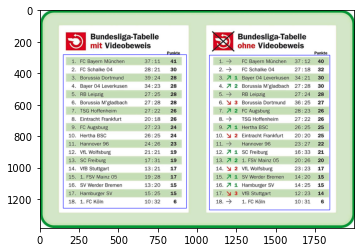

In [5]:
document_img = cv2.imread("/Users/aifen/Desktop/example.jpg")
table_detection.plot_prediction(document_img, predictor)

Number of tables on this page: 2




<Figure size 3600x3600 with 0 Axes>

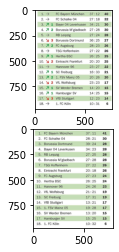

In [6]:
table_list, table_coords = table_detection.make_prediction(document_img, predictor)

In [7]:
print(table_coords)

[[1075, 286, 764, 982], [147, 283, 783, 973]]


### Pipeline for Text-Based Tables

**<u> URLs Dataframes </u>** (can be deprecated since we are using XM's json)

In [10]:
asian_banks_df = pd.read_excel('ESG Data Collection.xlsx', sheet_name='Asian Banks (Group 18)').fillna(method='ffill')
insurance_df = pd.read_excel('ESG Data Collection.xlsx', sheet_name='Insurance (Group 20)').fillna(method='ffill')
asset_df = pd.read_excel('ESG Data Collection.xlsx', sheet_name='Asset managers (Group 7)').fillna(method='ffill')
pension_funds_df = pd.read_excel('ESG Data Collection.xlsx', sheet_name='Pension funds (Group 8)').fillna(method='ffill')

In [11]:
pension_funds_df

,Fund,Market,PDF Link,Year,Remarks,Unnamed: 5
0,Government Pension Investment Fund,Japan,https://www.gpif.go.jp/en/investment/GPIF_ESGR...,2019,NaN,NaN
1,Government Pension Investment Fund,Japan,https://www.gpif.go.jp/en/investment/190905_Es...,2018,NaN,NaN
2,Government Pension Investment Fund,Japan,https://www.gpif.go.jp/en/investment/esg_repor...,2017,NaN,NaN
3,Government Pension Fund,Norway,https://www.nbim.no/contentassets/fef0e2802b3f...,2020,NaN,NaN
4,Government Pension Fund,Norway,https://www.nbim.no/contentassets/aaa1c4c4557e...,2019,NaN,NaN
...,...,...,...,...,...,...
72,FEFSS,Portugal,https://www.seg-social.pt/documents/10152/4389...,2018,In Portugese,2019 Report unavailable
73,FEFSS,Portugal,https://www.seg-social.pt/documents/10152/4389...,2017,In Portugese,2019 Report unavailable
74,Fonds de Comp./Securite Sociale,Luxembourg,https://fdc.public.lu/en/publications/rapports...,2020,Download manually.,2019 Report unavailable
75,Ireland Strategic Investment,Ireland,https://isif.ie/uploads/publications/SRIS-2020...,2020,Download manually.,2019 Report unavailable


**<u> Utility Functions </u>**

In [ ]:
def get_pdf_dimension(pdf_url):
    response = requests.get(pdf_url)
    with io.BytesIO(response.content) as open_pdf_file:
        pdf = PdfFileReader(open_pdf_file, strict=False)
        height = pdf.getPage(0).mediaBox.getHeight()
        width = pdf.getPage(0).mediaBox.getWidth()
    return height, width

# https://stackoverflow.com/questions/51481200/convert-pdf-to-image-using-pdf-url-pdf2image
# https://stackoverflow.com/questions/65180516/python-pdf2image-from-link-unable-to-get-page-count **

def get_image_and_dimension(pdf_url):
    response = requests.get(pdf_url, stream=True, timeout=30)
    # pdf = gzip.open(response.raw)
    # images = pdf2image.convert_from_bytes(pdf.read())
    images = pdf2image.convert_from_bytes(response.content)
    pg_1_img = images[0] # type=PIL.PpmImagePlugin.PpmImageFile
    width, height = pg_1_img.size
    return height, width, images

def get_scaling_factor(pdf_height, pdf_width, img_height, img_width):
    scaling_factor_height = img_height/pdf_height
    scaling_factor_width = img_width/pdf_width
    return scaling_factor_height, scaling_factor_width

def convert_PIL_cv2(pdf_pil_img):
    pdf_cv2_img = []
    for pil_img in pdf_pil_img:
        cv2_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
        pdf_cv2_img.append(cv2_img)
    return pdf_cv2_img

def extract_tbl_from_page(page_no, pdf_cv2_img, scaling_factor_height, scaling_factor_width, img_height, url):
    table_list, table_coords = table_detection.make_prediction(pdf_cv2_img[page_no-1], predictor)
    tbl_lst = []
    
    for table_coord in table_coords:
        try: 
            x1 = table_coord[0]
            y1 = table_coord[1]
            x2 = table_coord[2] + table_coord[0]
            y2 = table_coord[3] + table_coord[1]
            
            # cv2 and pdf used 2 different coordinate systems, thus y1 and y2 need to be modified
            y1 = img_height - y1
            y2 = img_height - y2
            
            # scale by scaling factors
            scaled_x1 = x1/scaling_factor_width
            scaled_x2 = x2/scaling_factor_width
            scaled_y1 = y1/scaling_factor_height
            scaled_y2 = y2/scaling_factor_height
            
            coords = f"{scaled_x1}, {scaled_y1}, {scaled_x2}, {scaled_y2}"
            
            tbls_scaled = camelot.read_pdf(url, flavor='stream', edge_tol=50, pages=str(page_no), flag_size=True, table_areas=[coords], split_text=True) # split_text=True
            tbl_lst.append(tbls_scaled[0].df)
        except:
            continue 
    
    return tbl_lst

def extract_tbl_from_pdf(pdf_url):
    pdf_lst = []
    
    # consistent to all pages in a pdf_url 
    pdf_height, pdf_width = get_pdf_dimension(pdf_url)
    img_height, img_width, pdf_pil_img = get_image_and_dimension(pdf_url)
    scaling_factor_height, scaling_factor_width = get_scaling_factor(pdf_height, pdf_width, img_height, img_width)
    
    # convert PIL images to CV images
    pdf_cv2_img = convert_PIL_cv2(pdf_pil_img)
    
    # pdf_cv2_img = images of all pages in a pdf 
    for page_no in range(len(pdf_cv2_img)):
        tbl_lst = extract_tbl_from_page(page_no, pdf_cv2_img, scaling_factor_height, scaling_factor_width, img_height, pdf_url)
        pdf_lst.append(tbl_lst)
        
    return pdf_lst 

def extract_tbl_from_df_fund(df):
    # key = tuple (company, year)
    # value = lst of lst containing dfs
    
    funds_dict = {}
    
    for index, row in df.iterrows():
        company_name = row['Fund']
        year = row['Year']
        pdf_url = row['PDF Link']
        print(company_name, year)

    try:
        pdf_lst = extract_tbl_from_pdf(pdf_url)
        funds_dict[(company_name, year)] = pdf_lst 
    except Exception as e: 
        print(e)
        continue 
    
    return funds_dict 